In [7]:
import matplotlib
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

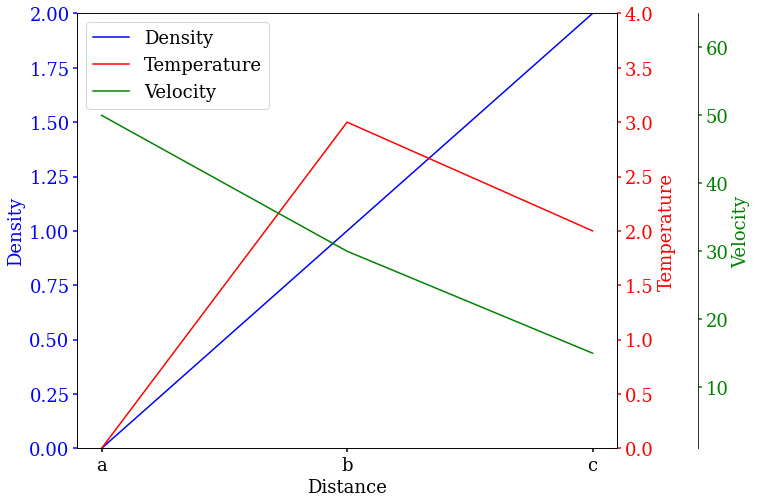

In [8]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.15))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

x = ['a', 'b', 'c']
p1, = host.plot(x, [0, 1, 2], "b-", label="Density")
p2, = par1.plot(x, [0, 3, 2], "r-", label="Temperature")
p3, = par2.plot(x, [50, 30, 15], "g-", label="Velocity")


host.set_ylim(0, 2)

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])
plt.show()

In [3]:
deen = """Vocab Size	Class Imbalance(D)	 Seq Length(μ)	BLEU
64K	0.87	27.61	16.1
32K	0.81	27.87	17.9
16K	0.73	28.63	19.7
8K	0.64	30.41	20.8
4K	0.56	34.1	20.4
2K	0.5	40.26	20.4
1K	0.47	49.32	18.45
Chars (170)	0.82	150.15	4.5""".replace('\t', ',')
ende = """Vocab Size	Class Imbalance(D)	 Seq Length(μ)	BLEU
64K	0.79	27.04	12.7
32K	0.72	28	16.2
16K	0.65	29.88	16.7
8K	0.57	33.2	17.1
4K	0.52	38.56	16.8
2K	0.48	45.99	16.8
1K	0.45	56.39	15.55
Chars (170)	0.79	169.24	3.7""".replace('\t', ',')
print(deen)
print()
print(ende)

Vocab Size,Class Imbalance(D), Seq Length(μ),BLEU
64K,0.87,27.61,16.1
32K,0.81,27.87,17.9
16K,0.73,28.63,19.7
8K,0.64,30.41,20.8
4K,0.56,34.1,20.4
2K,0.5,40.26,20.4
1K,0.47,49.32,18.45
Chars (170),0.82,150.15,4.5

Vocab Size,Class Imbalance(D), Seq Length(μ),BLEU
64K,0.79,27.04,12.7
32K,0.72,28,16.2
16K,0.65,29.88,16.7
8K,0.57,33.2,17.1
4K,0.52,38.56,16.8
2K,0.48,45.99,16.8
1K,0.45,56.39,15.55
Chars (170),0.79,169.24,3.7


In [4]:
def parse(s):
    lines = s.split('\n')
    res = [lines[0].split(',')]
    for l in lines[1:]:
        cols = l.split(',')
        res.append([cols[0]] + [float(c) for c in cols[1:]])
    return res

parse(deen)

[['Vocab Size', 'Class Imbalance(D)', ' Seq Length(μ)', 'BLEU'],
 ['64K', 0.87, 27.61, 16.1],
 ['32K', 0.81, 27.87, 17.9],
 ['16K', 0.73, 28.63, 19.7],
 ['8K', 0.64, 30.41, 20.8],
 ['4K', 0.56, 34.1, 20.4],
 ['2K', 0.5, 40.26, 20.4],
 ['1K', 0.47, 49.32, 18.45],
 ['Chars (170)', 0.82, 150.15, 4.5]]

saving to deen-bleu.pdf


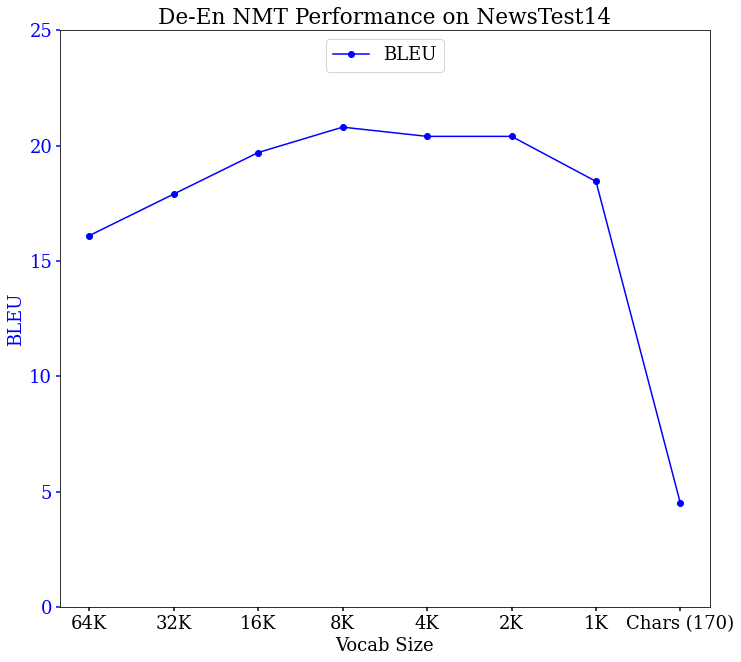

saving to deen-summary.pdf


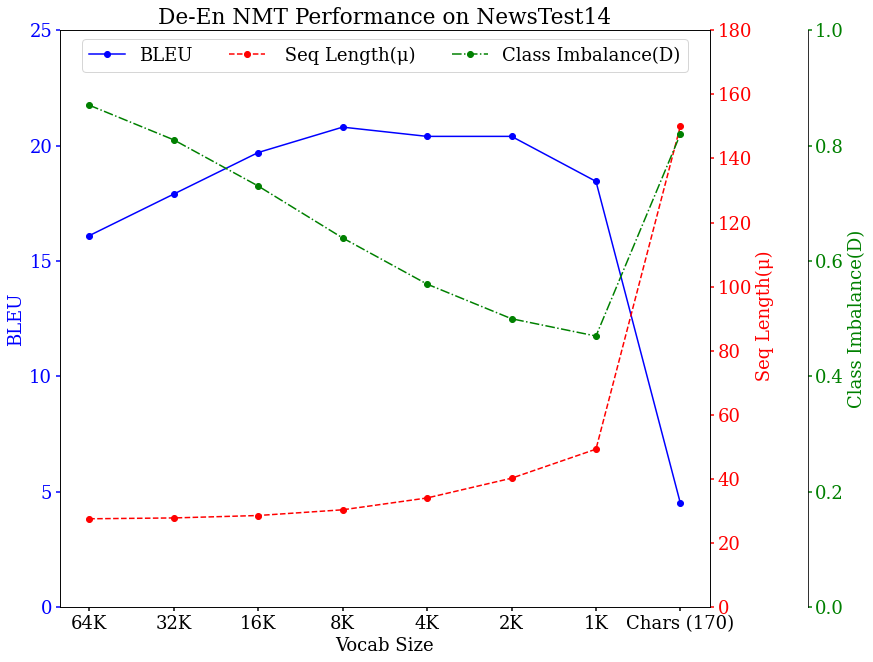

saving to ende-bleu.pdf


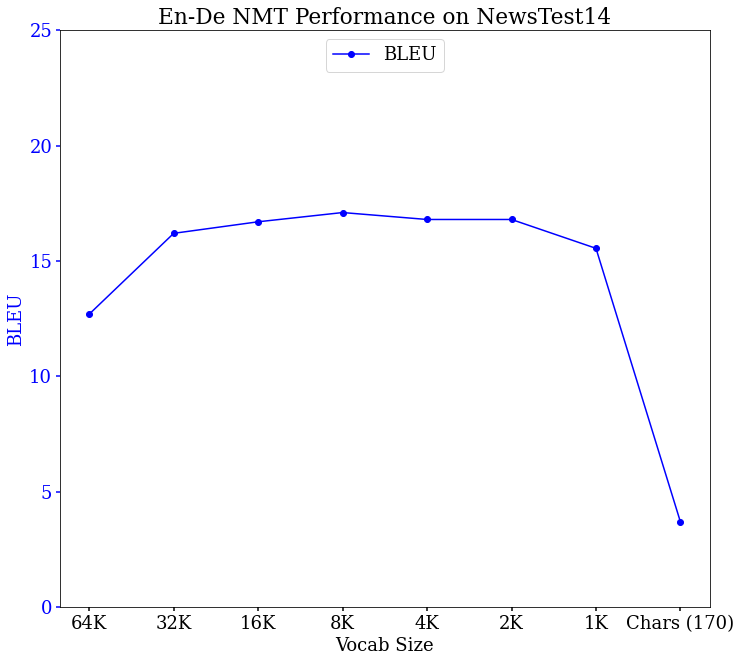

saving to ende-summary.pdf


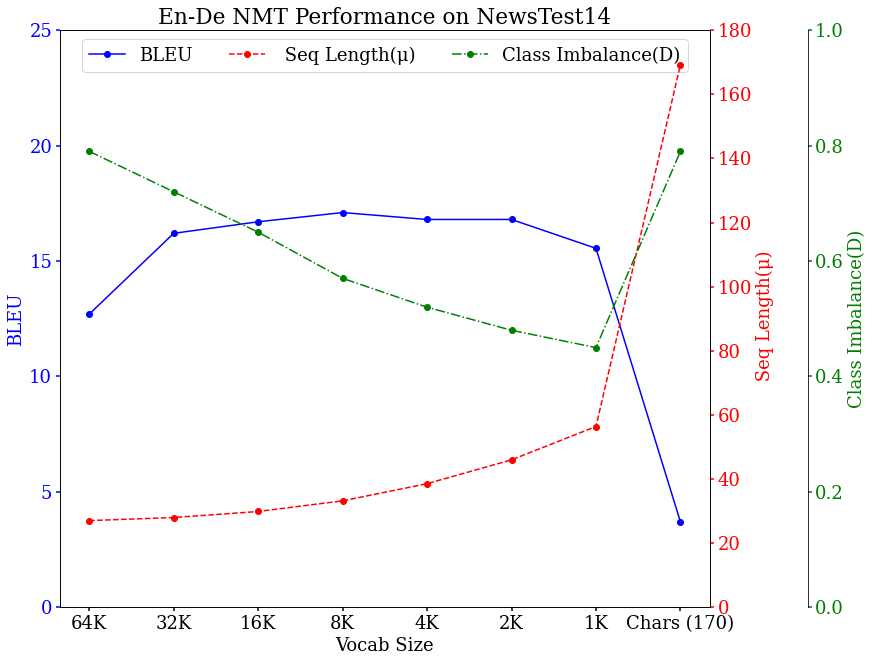

In [9]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

def one_axis_plot(data, y_maxs=None, title=None, y_mins=None, save=None):
    assert len(data[0]) == 4
    legends = data[0]
    data = data[1:]
    x = [row[0] for row in data]
    lines = [[row[col_idx] for row in data] for col_idx in [1,2,3]]
    assert len(lines) == 3

    
    fig, host = plt.subplots(figsize=(14, 9))
    fig.tight_layout()    
    fig.subplots_adjust(right=0.7)

    par1 = host


    p1, = par1.plot(x, lines[0], "b-o", label=legends[1])

    y_mins = y_mins or [0] * 3
    y_maxs = y_maxs or [max(line) for line in lines]
    par1.set_ylim(y_mins[0], y_maxs[0])

    par1.set_xlabel(legends[0])
    par1.set_ylabel(legends[1])

    par1.yaxis.label.set_color(p1.get_color())

    tkw = dict(size=4, width=1.5)
    par1.tick_params(axis='y', colors=p1.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    lines = [p1]

    host.legend(lines, [l.get_label() for l in lines], loc='upper center', ncol=3, fancybox=True)
    if title:
        plt.title(title)

    if save:
        print(f'saving to {save}')
        plt.savefig(save)
    plt.show()
    
def three_axes_plot(data, y_maxs=None, title=None, y_mins=None, save=None):

    assert len(data[0]) == 4
    legends = data[0]
    data = data[1:]
    x = [row[0] for row in data]
    lines = [[row[col_idx] for row in data] for col_idx in [1,2,3]]
    assert len(lines) == 3

    
    fig, host = plt.subplots(figsize=(14, 9))
    fig.tight_layout()    
    fig.subplots_adjust(right=0.7)

    par1 = host
    par2 = host.twinx()
    par3 = host.twinx()

    # Offset the right spine of par3.  The ticks and label have already been
    # placed on the right by twinx above.
    par3.spines["right"].set_position(("axes", 1.15))
    # Having been created by twinx, par3 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par3)
    # Second, show the right spine.
    par3.spines["right"].set_visible(True)

    p1, = par1.plot(x, lines[0], "b-o", label=legends[1])
    p2, = par2.plot(x, lines[1], "r--o", label=legends[2])
    p3, = par3.plot(x, lines[2], "g-.o", label=legends[3])

    y_mins = y_mins or [0] * 3
    y_maxs = y_maxs or [max(line) for line in lines]
    par1.set_ylim(y_mins[0], y_maxs[0])
    par2.set_ylim(y_mins[1], y_maxs[1])
    par3.set_ylim(y_mins[2], y_maxs[2])

    par1.set_xlabel(legends[0])
    par1.set_ylabel(legends[1])
    par2.set_ylabel(legends[2])
    par3.set_ylabel(legends[3])

    par1.yaxis.label.set_color(p1.get_color())
    par2.yaxis.label.set_color(p2.get_color())
    par3.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    par1.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p2.get_color(), **tkw)
    par3.tick_params(axis='y', colors=p3.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    lines = [p1, p2, p3]

    host.legend(lines, [l.get_label() for l in lines], loc='upper center', ncol=3, fancybox=True)

    if title:
        plt.title(title)
    if save:
        print(f'saving to {save}')
        plt.savefig(save)
    plt.show()

y_maxs = [25, 180, 1]

def parse2(s):
    """swap BLEU"""
    data = parse(s)
    for row in data:
        row[1], row[-1] = row[-1], row[1]
    return data

one_axis_plot(parse2(deen), y_maxs=y_maxs, title='De-En NMT Performance on NewsTest14')
three_axes_plot(parse2(deen), y_maxs=y_maxs, title='De-En NMT Performance on NewsTest14')
one_axis_plot(parse2(ende), y_maxs=y_maxs, title='En-De NMT Performance on NewsTest14' )
three_axes_plot(parse2(ende), y_maxs=y_maxs, title='En-De NMT Performance on NewsTest14')